In [25]:
!pip install opencv-python


In [74]:
#From Scratch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

In [75]:
img = cv2.cvtColor(cv2.imread('dog.4939.jpg'), cv2.COLOR_BGR2RGB)

In [76]:
img.shape

(288, 287, 3)

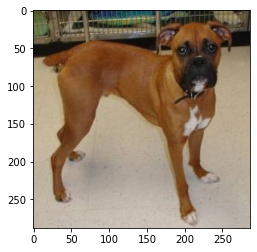

In [77]:
plt.imshow(img)

In [78]:
r, g, b = cv2.split(img)

In [79]:
r , g, b = r/255, b/ 255, g/255

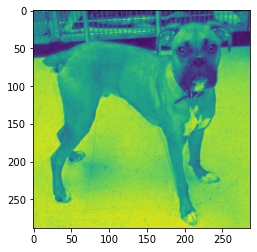

In [80]:
plt.imshow(r)

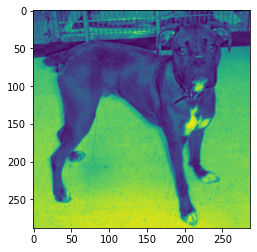

In [81]:
plt.imshow(g)

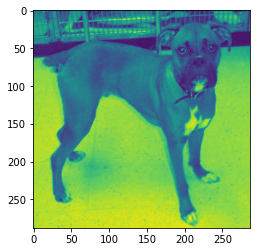

In [82]:
plt.imshow(b)

In [83]:
import cv2
import numpy as np
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt
# create gaussian noise
mean = 0
var = 0.1
sigma = np.sqrt(var)
n = np.random.normal(loc=mean, 
                     scale=sigma, 
                     size=(288,287,))

In [84]:
PCA_componants = 128

pca_r = PCA(n_components = PCA_componants)
reduced_r = pca_r.fit_transform(r+n)

pca_g = PCA(n_components = PCA_componants)
reduced_g = pca_g.fit_transform(g+n)

pca_b = PCA(n_components = PCA_componants)
reduced_b = pca_b.fit_transform(b+n)

In [85]:
reduced_r.shape

(288, 128)

In [86]:
reduced_g.shape

(288, 128)

In [87]:
reduced_b.shape

(288, 128)

In [88]:
combined = np.array([reduced_r,reduced_g, reduced_b])

In [89]:
combined.shape

(3, 288, 128)

In [90]:
# reconstructed image
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

In [91]:
reconstructed_r.shape

(288, 287)

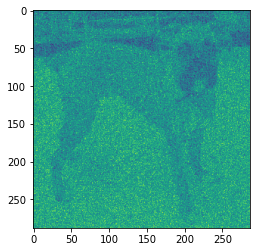

In [92]:
plt.imshow(reconstructed_r)

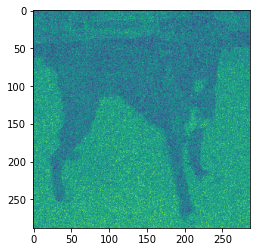

In [93]:
plt.imshow(reconstructed_g)

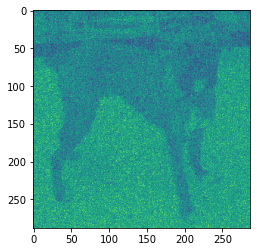

In [94]:
plt.imshow(reconstructed_b)

In [95]:
img_reconstructed = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


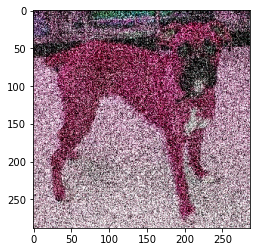

In [96]:
plt.imshow(img_reconstructed)

In [97]:
compression_ratio = ((img.shape[1]-PCA_componants)/img.shape[1])*100
print(compression_ratio)

55.400696864111495
